In [1]:
from beamline_29 import IEX

In [2]:
import time
import matplotlib.pyplot as plt
import math

In [3]:
IEX.run()

68412

In [4]:
IEX.sample()
IEX.run()

319

In [5]:
IEX.run()

319

In [6]:
IEX.center()
IEX.run()

68412

Things are working as expected

In [10]:
%%timeit
IEX.sample()
IEX.run()

646 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%prun IEX.run()

         36 function calls in 0.799 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        6    0.748    0.125    0.748    0.125 {method 'traceOE' of 'Beam' objects}
        1    0.048    0.048    0.048    0.048 {method 'genSource' of 'Beam' objects}
        1    0.001    0.001    0.001    0.001 {method 'copy' of 'numpy.ndarray' objects}
        1    0.001    0.001    0.799    0.799 beamline_29.py:297(run)
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.002    0.002 ShadowLibExtensions.py:399(nrays)
        1    0.000    0.000    0.000    0.000 beamline_29.py:108(resetBeamline)
        1    0.000    0.000    0.799    0.799 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 ShadowLibExtensions.py:180(getshonecol)
        4    0.000    0.000    0.000    0.000 {built-in method numpy.array}
        

In [9]:
rays = []
t1 = time.time()
for i in range(3000):
    IEX.sample()
    rays.append(IEX.run())
    print('\r Iteration %d' % i, end = ' ')
    
print(' ')
t2 = time.time()
print('Duration: %f' % (t2 - t1))

 Iteration 2999  
Duration: 1995.507697


(array([2084.,  183.,  118.,   71.,   82.,   61.,   60.,   48.,   39.,
          33.,   36.,   31.,   27.,   29.,   27.,   19.,   10.,   18.,
          14.,   10.]),
 array([    0.  ,  4720.75,  9441.5 , 14162.25, 18883.  , 23603.75,
        28324.5 , 33045.25, 37766.  , 42486.75, 47207.5 , 51928.25,
        56649.  , 61369.75, 66090.5 , 70811.25, 75532.  , 80252.75,
        84973.5 , 89694.25, 94415.  ]),
 <a list of 20 Patch objects>)

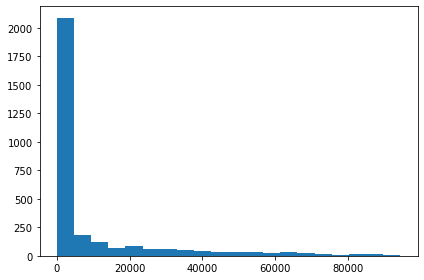

In [12]:
fig, axs = plt.subplots(1, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg

axs.hist(rays, bins=20)

Reducing sampling region by 90%

In [11]:
IEX.sRange = IEX.sRange *0.1

In [12]:
rays2 = []
t1 = time.time()
for i in range(3000):
    IEX.sample()
    rays2.append(IEX.run())
    print('\r Iteration %d' % i, end = ' ')
    
print(' ')
t2 = time.time()
print('Duration: %f' % (t2 - t1))

 Iteration 2999  
Duration: 2033.158911


(array([  1.,   1.,   6.,  12.,  11.,  28.,  41.,  52.,  66., 102., 161.,
        213., 330., 368., 380., 332., 316., 249., 230., 101.]),
 array([49472.  , 50640.95, 51809.9 , 52978.85, 54147.8 , 55316.75,
        56485.7 , 57654.65, 58823.6 , 59992.55, 61161.5 , 62330.45,
        63499.4 , 64668.35, 65837.3 , 67006.25, 68175.2 , 69344.15,
        70513.1 , 71682.05, 72851.  ]),
 <a list of 20 Patch objects>)

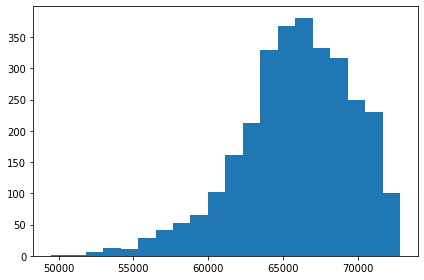

In [13]:
fig, axs = plt.subplots(1, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg

axs.hist(rays2, bins=20)

Setting window to 0.25 of original

In [14]:
IEX.sRange = IEX.sRange *2.5

In [15]:
rays3 = []
t1 = time.time()
for i in range(3000):
    IEX.sample()
    rays3.append(IEX.run())
    print('\r Iteration %d' % i, end = ' ')
    
print(' ')
t2 = time.time()
print('Duration: %f' % (t2 - t1))

 Iteration 2999  
Duration: 2028.777374


(array([  6.,  19.,  27.,  39.,  47.,  69.,  66.,  94., 105., 125., 131.,
        172., 219., 335., 323., 307., 317., 237., 238., 124.]),
 array([ 9193.  , 12645.25, 16097.5 , 19549.75, 23002.  , 26454.25,
        29906.5 , 33358.75, 36811.  , 40263.25, 43715.5 , 47167.75,
        50620.  , 54072.25, 57524.5 , 60976.75, 64429.  , 67881.25,
        71333.5 , 74785.75, 78238.  ]),
 <a list of 20 Patch objects>)

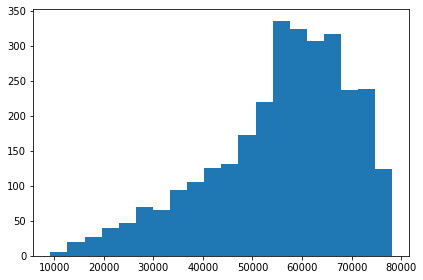

In [16]:
fig, axs = plt.subplots(1, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg

axs.hist(rays3, bins=20)

In [17]:
IEX.sRange = IEX.sRange * 4.0 * 0.4 # now at 0.4 of original

In [18]:
IEX.sRange

array([[[-8.160e+00,  8.160e+00],
        [-8.000e+00,  8.000e+00],
        [-6.000e-01,  6.000e-01],
        [-4.000e-03,  4.000e-03],
        [-2.480e-01,  2.480e-01],
        [-8.000e+00,  8.000e+00]],

       [[-9.160e+00,  9.160e+00],
        [-8.000e+00,  8.000e+00],
        [-1.000e+00,  1.000e+00],
        [-4.000e-03,  4.000e-03],
        [-7.200e-02,  7.200e-02],
        [-8.000e+00,  8.000e+00]],

       [[-6.440e+00,  6.440e+00],
        [-8.000e+00,  8.000e+00],
        [-3.600e-01,  3.600e-01],
        [-8.000e-03,  8.000e-03],
        [-1.480e-01,  1.480e-01],
        [-8.000e+00,  8.000e+00]],

       [[-5.440e+00,  5.440e+00],
        [-1.400e+00,  1.400e+00],
        [-4.000e-01,  4.000e-01],
        [-8.000e-03,  8.000e-03],
        [-1.400e-01,  1.400e-01],
        [-2.996e+00,  2.996e+00]],

       [[-3.320e+00,  3.320e+00],
        [-1.680e+01,  1.680e+01],
        [-2.000e+00,  2.000e+00],
        [-1.600e-01,  1.600e-01],
        [-1.288e+00,  1.288e+00],
      

In [19]:
rays4 = []
t1 = time.time()
for i in range(3000):
    IEX.sample()
    rays4.append(IEX.run())
    print('\r Iteration %d' % i, end = ' ')
    
print(' ')
t2 = time.time()
print('Duration: %f' % (t2 - t1))

 Iteration 2999  
Duration: 1916.172643


(array([105., 118., 154., 127., 146., 161., 134., 159., 174., 167., 193.,
        185., 221., 181., 177., 167., 147., 135., 102.,  47.]),
 array([  112. ,  4267.8,  8423.6, 12579.4, 16735.2, 20891. , 25046.8,
        29202.6, 33358.4, 37514.2, 41670. , 45825.8, 49981.6, 54137.4,
        58293.2, 62449. , 66604.8, 70760.6, 74916.4, 79072.2, 83228. ]),
 <a list of 20 Patch objects>)

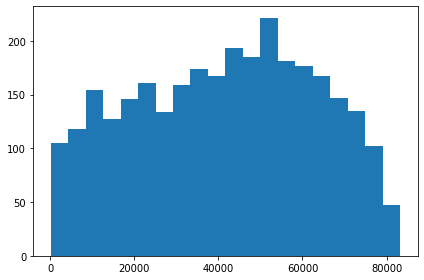

In [20]:
fig, axs = plt.subplots(1, 1, tight_layout=True)

# We can set the number of bins with the `bins` kwarg

axs.hist(rays4, bins=20)

In [21]:
IEX.pos

array([[-7.24294901e-01,  0.00000000e+00,  0.00000000e+00,
         2.06602667e-03,  0.00000000e+00,  0.00000000e+00],
       [ 1.95474745e+00,  0.00000000e+00,  0.00000000e+00,
         9.59910989e-04,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.35735988e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -7.52590956e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -7.29849903e+00,  0.00000000e+00,
        -9.79470338e-02, -4.47809545e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.84877822e+01,  0.00000000e+00,
         4.63330644e-01, -1.41332606e+00,  0.00000000e+00]])

In [22]:
IEX.pos[IEX.mask == 1]

array([-7.24294901e-01,  2.06602667e-03,  1.95474745e+00,  9.59910989e-04,
       -3.35735988e-03, -7.52590956e-03, -7.29849903e+00, -9.79470338e-02,
       -4.47809545e-01,  1.84877822e+01,  4.63330644e-01, -1.41332606e+00])

 Iteration 99999 -- run duration 64213 s  
Duration: 64212.236860


(array([3506., 3977., 4119., 4325., 4465., 4771., 4900., 5199., 5509.,
        6059., 6588., 7380., 7245., 6685., 5898., 5643., 4968., 4274.,
        3187., 1302.]),
 array([  112.  ,  4297.75,  8483.5 , 12669.25, 16855.  , 21040.75,
        25226.5 , 29412.25, 33598.  , 37783.75, 41969.5 , 46155.25,
        50341.  , 54526.75, 58712.5 , 62898.25, 67084.  , 71269.75,
        75455.5 , 79641.25, 83827.  ]),
 <a list of 20 Patch objects>)

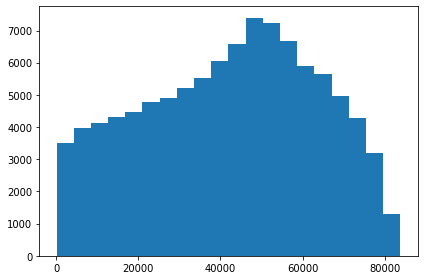

In [43]:
rays5 = []
positioners = []

t1 = time.time()
for i in range(100000):
    IEX.sample()
    rays5.append(IEX.run())
    positioners.append(IEX.pos[IEX.mask == 1])
    print("\r Iteration {:} -- run duration {:1d} s".format(i, math.ceil(time.time()-t1)), end = ' ')
    
print(' ')
t2 = time.time()
print('Duration: %f' % (t2 - t1))

fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.hist(rays5, bins=20)

In [47]:
positioners[0].shape

(12,)

In [48]:
len(rays5)

100000

In [49]:
import pickle

In [50]:
data = {'y': rays5, 'x':positioners}

In [53]:
data['x'][1]

array([ 4.11249165e-01,  3.72877390e-03, -5.42909342e+00,  1.34745851e-03,
        2.71554575e-03,  4.17568269e-03, -4.53801650e+00, -5.52804760e-02,
        1.16616223e+00,  5.21392605e-01,  3.74671810e-01, -6.61753323e-01])

In [58]:
rays5[0], rays5[1], positioners[1]

(62184,
 7104,
 array([ 4.11249165e-01,  3.72877390e-03, -5.42909342e+00,  1.34745851e-03,
         2.71554575e-03,  4.17568269e-03, -4.53801650e+00, -5.52804760e-02,
         1.16616223e+00,  5.21392605e-01,  3.74671810e-01, -6.61753323e-01]))

In [59]:
pickle.dump(data, open("IEX_100k_04w.pkl", "wb"))